<a href="https://colab.research.google.com/github/410650377/introduction-to-Computers/blob/main/%E6%8A%95%E8%B3%87%E7%AE%A1%E7%90%86Lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investment Management (L01): The Foundations of Risk and Return

## Author: I-Chan Chiu

This Google Colab notebook serves as the hands-on practical session for Lecture 1: "The Foundations of Risk and Return." We will use the Python programming language to bring the concepts from the lecture to life. By working with real financial data, you will:

1. Calculate fundamental risk and return metrics.
2. Visualize the principles of diversification.
3. Understand the mathematical relationship between correlation, risk, and portfolio construction.

## Setup: Installing and Importing Libraries

In [232]:
!pip install yfinance -q

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
plt.rcParams['axes.unicode_minus'] = False

## Pandas Warm-Up: A Quick Introduction
Before we dive into financial theories, let's take a few moments to get comfortable with `pandas`, the most important Python library for data manipulation and analysis. Think of it as a super-powered version of Excel, but programmable Everything we will do in this notebook relies on pandas. Understanding these few basic concepts will make the rest of the lesson much clearer.

### 1)The Core Components: Series and DataFrame
Pandas has two main data structures:

* **Series:** A one-dimensional array with labels. You can think of it as a single column of data, like the daily prices of one stock.
* **DataFrame:** A two-dimensional table with labeled rows and columns. This is our primary tool and is like a spreadsheet. Each column in a DataFrame is a Series.

In [233]:
# A Series of Apple's prices for a week
aapl_prices = pd.Series([170, 172, 171, 175, 174], index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
print("--- This is a Pandas Series ---")
print(aapl_prices)

--- This is a Pandas Series ---
Mon    170
Tue    172
Wed    171
Thu    175
Fri    174
dtype: int64


In [234]:
# A DataFrame containing prices for two stocks
price_data = {
    'Apple (AAPL)': [170, 172, 171, 175, 174],
    'Microsoft (MSFT)': [300, 305, 302, 308, 307]
}#Dictionary

price_df = pd.DataFrame(price_data, index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
print("--- This is a Pandas DataFrame ---")
print(price_df)

--- This is a Pandas DataFrame ---
     Apple (AAPL)  Microsoft (MSFT)
Mon           170               300
Tue           172               305
Wed           171               302
Thu           175               308
Fri           174               307


### Loading and Inspecting Data
In our main lesson, we'll use the `yfinance` library to download data, which conveniently gives it to us as a Pandas DataFrame. Let's download some data for the S&P 500 ETF (ticker: SPY) to practice with.

Common first steps after loading data are using:
* head() to see the first few rows.
* tail() to see the last few rows.
* info() to get a summary of the columns and data types.

In [235]:
# Download one year of data for the "SPY" ETF
spy_data=yf.download('SPY',start='2023-01-01',end='2024-01-01',auto_adjust=False)


[*********************100%***********************]  1 of 1 completed


In [236]:
spy_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2023-01-03,367.150787,380.820007,386.429993,377.829987,384.369995,74850700
2023-01-04,369.985260,383.760010,385.880005,380.000000,383.179993,85934100
2023-01-05,365.762451,379.380005,381.839996,378.760010,381.720001,76970500
2023-01-06,374.150208,388.079987,389.250000,379.410004,382.609985,104189600
2023-01-09,373.938049,387.859985,393.700012,387.670013,390.369995,73978100
...,...,...,...,...,...,...
2023-12-22,463.589111,473.649994,475.380005,471.700012,473.859985,67160400
2023-12-26,465.546692,475.649994,476.579987,473.989990,474.070007,55387000


In [237]:
# First 5 rows of the data
spy_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2023-01-03,367.150787,380.820007,386.429993,377.829987,384.369995,74850700
2023-01-04,369.985260,383.760010,385.880005,380.000000,383.179993,85934100
2023-01-05,365.762451,379.380005,381.839996,378.760010,381.720001,76970500
2023-01-06,374.150208,388.079987,389.250000,379.410004,382.609985,104189600
2023-01-09,373.938049,387.859985,393.700012,387.670013,390.369995,73978100


In [238]:
# Last 5 rows of the data
spy_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2023-12-22,463.589111,473.649994,475.380005,471.700012,473.859985,67160400
2023-12-26,465.546692,475.649994,476.579987,473.989990,474.070007,55387000
2023-12-27,466.388428,476.510010,476.660004,474.890015,475.440002,68000300
2023-12-28,466.564575,476.690002,477.549988,476.260010,476.880005,77158100
2023-12-29,465.213928,475.309998,477.029999,473.299988,476.489990,122283100


In [239]:
# Summary of the DataFrame
spy_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, SPY)  250 non-null    float64
 1   (Close, SPY)      250 non-null    float64
 2   (High, SPY)       250 non-null    float64
 3   (Low, SPY)        250 non-null    float64
 4   (Open, SPY)       250 non-null    float64
 5   (Volume, SPY)     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


### Selecting Data (Indexing)
A crucial skill is grabbing the specific data you need.

* To get a column, use square brackets `['ColumnName']`.
* To get multiple columns, use double square brackets `[['Col1', 'Col2']]`.
* To get rows by their label (in our case, the date), use `.loc['label']`.

In [240]:
# Select a single column (this returns a Series)
close_prices=spy_data['Adj Close']
print(close_prices.head())

Ticker             SPY
Date                  
2023-01-03  367.150787
2023-01-04  369.985260
2023-01-05  365.762451
2023-01-06  374.150208
2023-01-09  373.938049


In [241]:
# Select multiple columns (this returns a DataFrame)
open_close=spy_data[['Open','Close']]
print(open_close.head())

Price             Open       Close
Ticker             SPY         SPY
Date                              
2023-01-03  384.369995  380.820007
2023-01-04  383.179993  383.760010
2023-01-05  381.720001  379.380005
2023-01-06  382.609985  388.079987
2023-01-09  390.369995  387.859985


In [242]:
# Select a specific row by its date label
spy_data.loc['2023-10-27']

,,2023-10-27
Price,Ticker,
Adj Close,SPY,4.003336e+02
Close,SPY,4.106800e+02
High,SPY,4.146000e+02
Low,SPY,4.092100e+02
Open,SPY,4.141900e+02
Volume,SPY,1.073677e+08


### Essential Calculations for Finance
Pandas has built-in functions that make financial calculations simple and fast.

#### Calculating Returns
The `.pct_change()` method is perfect for calculating period-over-period returns. Note that the first value will be NaN (Not a Number) because there is no previous period to compare it to. We typically remove this with `.dropna()`

In [243]:
# Calculate daily returns
daily_returns=spy_data['Adj Close'].pct_change()
print(daily_returns.head())

Ticker           SPY
Date                
2023-01-03       NaN
2023-01-04  0.007720
2023-01-05 -0.011413
2023-01-06  0.022932
2023-01-09 -0.000567


In [244]:
# Remove the NaN value
daily_returns=daily_returns.dropna()
print(daily_returns.head())

Ticker           SPY
Date                
2023-01-04  0.007720
2023-01-05 -0.011413
2023-01-06  0.022932
2023-01-09 -0.000567
2023-01-10  0.007013


#### Descriptive Statistics
Once you have a Series of returns, you can get key metrics with simple commands.

In [245]:
# Calculate descriptive statistics
mean_return=daily_returns.mean()
volatility=daily_returns.std()
summary_statistics=daily_returns.describe()
correlation_matrix=daily_returns.corr()

In [246]:
print(f"Average Daily Return: {mean_return}")
print(f"Daily Volatility (Standard Deviation): {volatility}")
print(f"Summary Statistics: {summary_statistics}")
print(f"Correlation Matrix: {correlation_matrix}")

Average Daily Return: Ticker
SPY    0.000985
dtype: float64
Daily Volatility (Standard Deviation): Ticker
SPY    0.008247
dtype: float64
Summary Statistics: Ticker         SPY
count   249.000000
mean      0.000985
std       0.008247
min      -0.020061
25%      -0.004086
50%       0.000732
75%       0.006368
max       0.022932
Correlation Matrix: Ticker  SPY
Ticker     
SPY     1.0


#### The Power of Vectorization
One of the best features of Pandas is that you can apply operations to entire columns at once without writing a loop. This is called vectorization. For example, if you wanted to calculate the daily price range `(High - Low)`, you don't need to loop through every row. You can just subtract the columns directly.

In [247]:
# Calculate the daily trading range
spy_data['Daily_Range']=spy_data['High']-spy_data['Low']
print(spy_data.head())

Price        Adj Close       Close        High         Low        Open  \
Ticker             SPY         SPY         SPY         SPY         SPY   
Date                                                                     
2023-01-03  367.150787  380.820007  386.429993  377.829987  384.369995   
2023-01-04  369.985260  383.760010  385.880005  380.000000  383.179993   
2023-01-05  365.762451  379.380005  381.839996  378.760010  381.720001   
2023-01-06  374.150208  388.079987  389.250000  379.410004  382.609985   
2023-01-09  373.938049  387.859985  393.700012  387.670013  390.369995   

Price          Volume Daily_Range  
Ticker            SPY              
Date                               
2023-01-03   74850700    8.600006  
2023-01-04   85934100    5.880005  
2023-01-05   76970500    3.079987  
2023-01-06  104189600    9.839996  
2023-01-09   73978100    6.029999  


## The Story of Ice Creams and Umbrellas: The Intuition of Diversification
Our lecture began with a simple story to build intuition: an Ice Cream company that profits in the sun, and an Umbrella company that profits in the rain. Individually, each is a risky investment, entirely dependent on the weather.

What happens if we combine them? The code below simulates this exact scenario to demonstrate the core concept of diversification.

In [248]:
# Simulate 12 months of weather conditions
# 1 represents sunny days, 0 represents rainy days
weather = np.array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])
months = pd.to_datetime(pd.date_range(start='2024-01', periods=12, freq='ME')).strftime('%Y-%m')

# Set the return rates for the two companies
# Ice Cream Company: 20% profit on sunny days, 15% loss on rainy days
ice_cream_returns = np.where(weather == 1, 0.20, -0.15)
# Umbrella Company: 10% loss on sunny days, 25% profit on rainy days
umbrella_returns = np.where(weather == 1, -0.10, 0.25)

In [249]:
# Create a DataFrame to store the data
df_story = pd.DataFrame({
    'Month': months,
    'Weather': ['Sunny' if w == 1 else 'Rainy' for w in weather],
    'Ice Cream Company Returns': ice_cream_returns,
    'Umbrella Company Returns': umbrella_returns
})

# Calculate the portfolio return with a 50:50 split
df_story['Portfolio Returns'] = 0.5 * df_story['Ice Cream Company Returns'] + 0.5 * df_story['Umbrella Company Returns']

print("--- Simulated Return Data Table ---")
print(df_story)

--- Simulated Return Data Table ---
      Month Weather  Ice Cream Company Returns  Umbrella Company Returns  \
0   2024-01   Rainy                      -0.15                      0.25   
1   2024-02   Rainy                      -0.15                      0.25   
2   2024-03   Rainy                      -0.15                      0.25   
3   2024-04   Rainy                      -0.15                      0.25   
4   2024-05   Sunny                       0.20                     -0.10   
5   2024-06   Sunny                       0.20                     -0.10   
6   2024-07   Rainy                      -0.15                      0.25   
7   2024-08   Sunny                       0.20                     -0.10   
8   2024-09   Sunny                       0.20                     -0.10   
9   2024-10   Sunny                       0.20                     -0.10   
10  2024-11   Sunny                       0.20                     -0.10   
11  2024-12   Rainy                      -0.15      

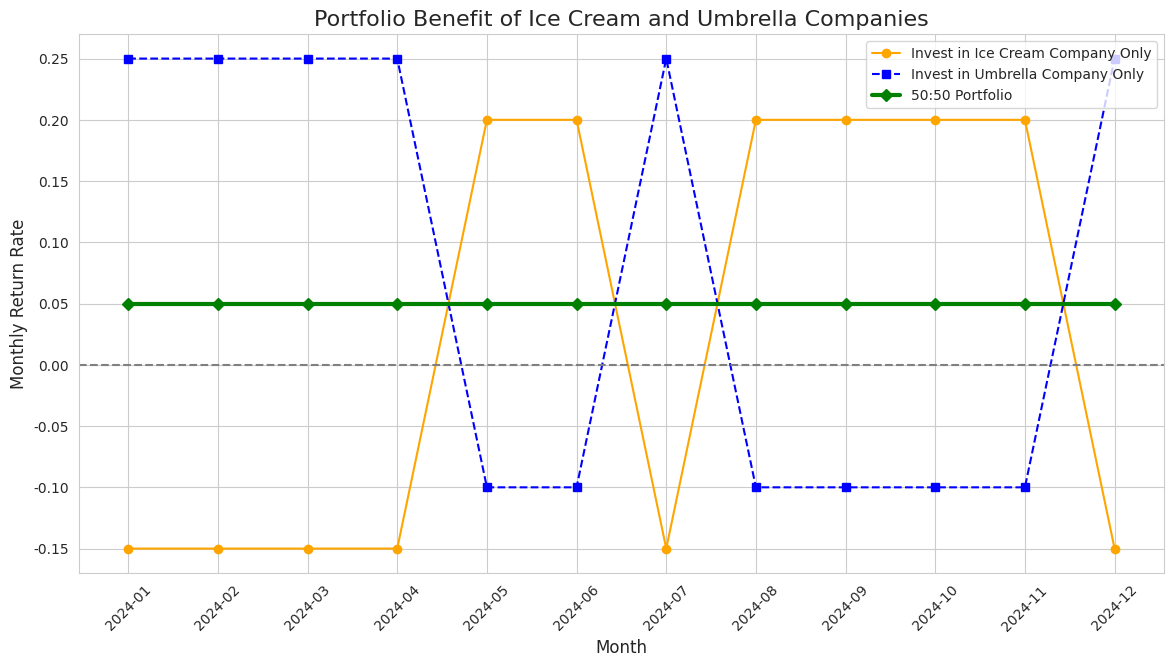

In [250]:
# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(df_story['Month'], df_story['Ice Cream Company Returns'], 'o-', label='Invest in Ice Cream Company Only', color='orange')
plt.plot(df_story['Month'], df_story['Umbrella Company Returns'], 's--', label='Invest in Umbrella Company Only', color='blue')
plt.plot(df_story['Month'], df_story['Portfolio Returns'], 'D-', label='50:50 Portfolio', color='green', linewidth=3)
plt.axhline(0, color='grey', linestyle='--')
plt.title('Portfolio Benefit of Ice Cream and Umbrella Companies', fontsize=16)
plt.ylabel('Monthly Return Rate', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [251]:
# Calculate and compare volatility (standard deviation)
print(f"\n--- Risk Comparison (Volatility) ---")
print(f"Ice Cream Company Returns Standard Deviation: {df_story['Ice Cream Company Returns'].std():.4f}")
print(f"Umbrella Company Returns Standard Deviation:  {df_story['Umbrella Company Returns'].std():.4f}")
print(f"Portfolio Returns Standard Deviation:    {df_story['Portfolio Returns'].std():.4f}")


--- Risk Comparison (Volatility) ---
Ice Cream Company Returns Standard Deviation: 0.1828
Umbrella Company Returns Standard Deviation:  0.1828
Portfolio Returns Standard Deviation:    0.0000


**Observation:** The green portfolio line is dramatically smoother than either of the individual investment lines. By combining two negatively correlated assets, the portfolio's volatility (risk) is drastically reduced. This is the magic of diversification.

## Measuring Return and Risk
Now, we move from the intuitive story to the formal quantitative framework. We will use real-world stock data for Apple (AAPL) and Microsoft (MSFT) to calculate the key metrics defined in the lecture.

### Data Acquisition and Calculating Returns
First, we download historical stock price data from Yahoo Finance and calculate the daily percentage returns, which will be the basis for all subsequent analysis.

In [252]:
# Download stock price data and calculate daily returns
# Set the stock tickers and time range for analysis
tickers = ['AAPL', 'MSFT']
start_date = '2020-01-01'
end_date = '2025-01-01'

In [253]:
# Download adjusted closing prices (Close)
# Adjusted closing prices account for dividends and stock splits, making them more suitable for return calculations
data=yf.download(tickers,start_date,end_date,auto_adjust=False)['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [254]:
# Calculate daily returns
# (P_t - P_{t-1}) / P_{t-1}
returns=data.pct_change().dropna()
print(returns.head())

Ticker          AAPL      MSFT
Date                          
2020-01-03 -0.009722 -0.012452
2020-01-06  0.007969  0.002585
2020-01-07 -0.004703 -0.009118
2020-01-08  0.016086  0.015928
2020-01-09  0.021241  0.012493


<Axes: xlabel='Date'>

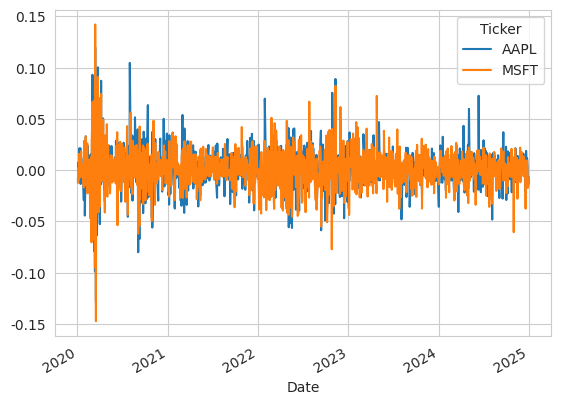

In [255]:
# Plot the time series of daily returns
returns.plot()

### Measuring Returns
#### Holding-Period Return (HPR)
The total return over a specific period. Let's calculate the HPR for AAPL for the year 2023.

\begin{align}
\mathbf{HPR} = \frac{P_1-P_0+D1}{P_0}
\end{align}

In [256]:
# Get the Apple stock prices at the beginning and end of 2023
p0=data['AAPL'].loc['2023-01-03']
p1=data['AAPL'].loc['2023-12-29']
hpr_aapl_2023=(p1-p0)/p0
print(f"Apple Inc. (AAPL) Holding-Period Return (HPR) for 2023: {hpr_aapl_2023:.2%}")

Apple Inc. (AAPL) Holding-Period Return (HPR) for 2023: 54.80%


#### Arithmetic vs. Geometric Average Return
The arithmetic average is the best forecast for the next period's return, while the geometric average represents the actual compound growth rate over a past period.

In [257]:
# @title << Calculate Arithmetic and Geometric Average Returns >>
# We will use Apple's daily returns as an example
aapl_returns = returns['AAPL']

In [258]:
# Arithmetic average daily return
aapl_returns.mean()
print(aapl_returns.mean())

0.0011821105644167005


In [259]:
# Geometric average daily return
# (1+r_1)*(1+r_2)*...*(1+r_n) ^ (1/n) - 1
((1+aapl_returns).prod())**(1/len(aapl_returns))-1

np.float64(0.0009833616729344463)

#### Annualizing Returns (APR vs. EAR)
To compare returns over different time frames, we must annualize them. We assume 252 trading days in a year.

In [260]:
# Calculate Annualized Returns
trading_days = 252

In [261]:
# Calculate annualized return using the arithmetic average daily return
# APR
mean_aapl =aapl_returns.mean()
APR = mean_aapl*trading_days
print(APR)

0.29789186223300856


In [262]:
# EAR
EAR = (1+mean_aapl)**trading_days-1
print(EAR)

0.3467791543952534


### Measuring Total Risk
#### Variance and Standard Deviation (Volatility)
Standard deviation is the primary measure of an asset's total risk.

In [263]:
# Calculate daily standard deviation (Daily Volatility)
vol_daily=aapl_returns.std()

In [264]:
# Annualized volatility
vol_annual=vol_daily*np.sqrt(trading_days)
print(vol_annual)

0.31678641443538713


#### Return Distribution: Skewness and Kurtosis
Financial returns are rarely normally distributed. Skewness measures asymmetry, and kurtosis measures the "fatness" of the tails (propensity for extreme outcomes).

In [265]:
# Calculate skewness and kurtosis
skewness=aapl_returns.skew()
kurtosis=aapl_returns.kurt()

print(f"Apple (AAPL) Daily Return Distribution:")
print(f"  - Skewness: {skewness:.4f}")
print(f"  - Excess Kurtosis: {kurtosis:.4f}")

Apple (AAPL) Daily Return Distribution:
  - Skewness: 0.1056
  - Excess Kurtosis: 5.2778


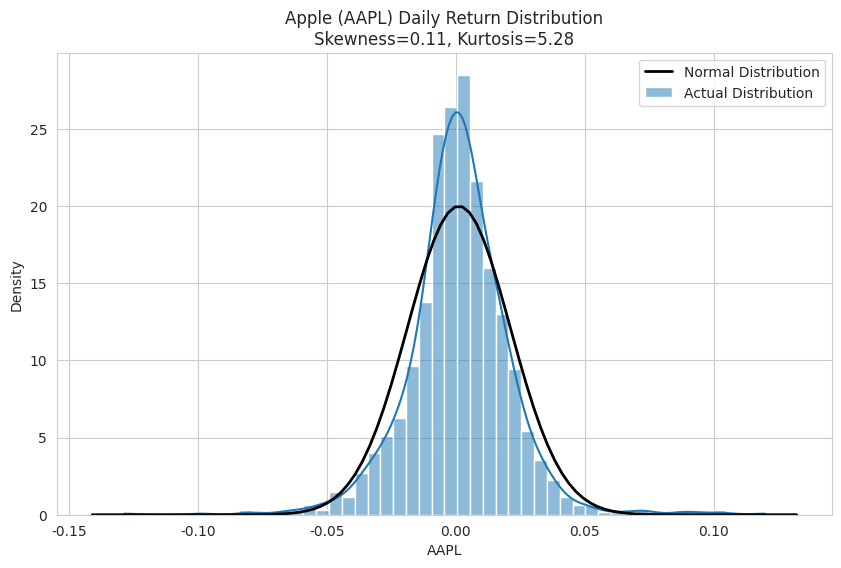


Observation: Apple's return distribution shows a slight negative skew and significant excess kurtosis (fat tails), which is common for financial assets.


In [266]:
# Visualize the return distribution
plt.figure(figsize=(10, 6))
sns.histplot(aapl_returns, kde=True, bins=50, stat="density", label='Actual Distribution')
# Plot a normal distribution with the same mean and standard deviation for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mean_aapl) / vol_daily)**2) / (vol_daily * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
plt.title(f'Apple (AAPL) Daily Return Distribution\nSkewness={skewness:.2f}, Kurtosis={kurtosis:.2f}')
plt.legend()
plt.show()

print("\nObservation: Apple's return distribution shows a slight negative skew and significant excess kurtosis (fat tails), which is common for financial assets.")

### Measuring Downside Risk
Standard deviation treats positive and negative volatility as equally "risky." However, investors are typically much more concerned about the risk of loss. Downside risk measures focus specifically on this "bad" volatility.

#### Downside Deviation ($\sigma_d$)
This is a measure of risk that only considers returns falling below a Minimum Acceptable Return (MAR). It calculates the volatility of negative outcomes, ignoring upside volatility. We'll set the MAR to 0, focusing on any return that is a loss.

\begin{align}
\mathbf{\sigma_d} = \sqrt{\frac{1}{N}\sum_{i=1}^{N} \min(0,r_i-MAR)^2}
\end{align}

In [267]:
# Calculate Downside Deviation
aapl_returns = returns['AAPL']

# Define the Minimum Acceptable Return (MAR). 0.0 is a common choice.
mar = 0.0

In [268]:
# 1. Select returns that fall below the MAR

downside_returns=aapl_returns[aapl_returns<mar]

# 2. Calculate the squared difference from the MAR for these returns
downside_diff_sq=(downside_returns-mar)**2

# 3. Calculate the annualized downside deviation
# We take the square root of the mean of these squared differences, then annualize.
downside_annual=np.sqrt(downside_diff_sq.mean())*np.sqrt(trading_days)

print(f"--- Downside Risk for Apple (AAPL) ---")
print(f"Total Annualized Volatility (Standard Deviation): {vol_annual:.2%}")
print(f"Annualized Downside Deviation (MAR = 0%): {downside_annual:.2%}")

--- Downside Risk for Apple (AAPL) ---
Total Annualized Volatility (Standard Deviation): 31.68%
Annualized Downside Deviation (MAR = 0%): 31.36%


#### Value at Risk (VaR)
VaR states the maximum loss expected over a given horizon at a given confidence level. A 5% VaR means we are 95% confident that losses will not exceed this value.



In [269]:
# Calculate Value at Risk (VaR)
# Calculate the 5% daily VaR
var_5=-aapl_returns.quantile(0.05)

print(f"Apple (AAPL) 5% Daily VaR (Historical Simulation): {var_5:.2%}")
print(f"This means that on any given trading day, we are 95% confident that the loss will not exceed {-var_95:.2%}, or there is a 5% chance that the loss will exceed {-var_95:.2%}")

Apple (AAPL) 5% Daily VaR (Historical Simulation): 3.01%
This means that on any given trading day, we are 95% confident that the loss will not exceed 3.01%, or there is a 5% chance that the loss will exceed 3.01%


### Measuring Dependence: Correlation
The effectiveness of diversification hinges on the correlation between assets.

\begin{align}
  \rho\in[-1,1]
\end{align}

In [270]:
# Calculate the correlation matrix of returns
correlation_matrix=returns.corr()
display(correlation_matrix)

Ticker,AAPL,MSFT
Ticker,,
AAPL,1.000000,0.748327
MSFT,0.748327,1.000000



Correlation Coefficient of Daily Returns between Apple and Microsoft: 0.7483


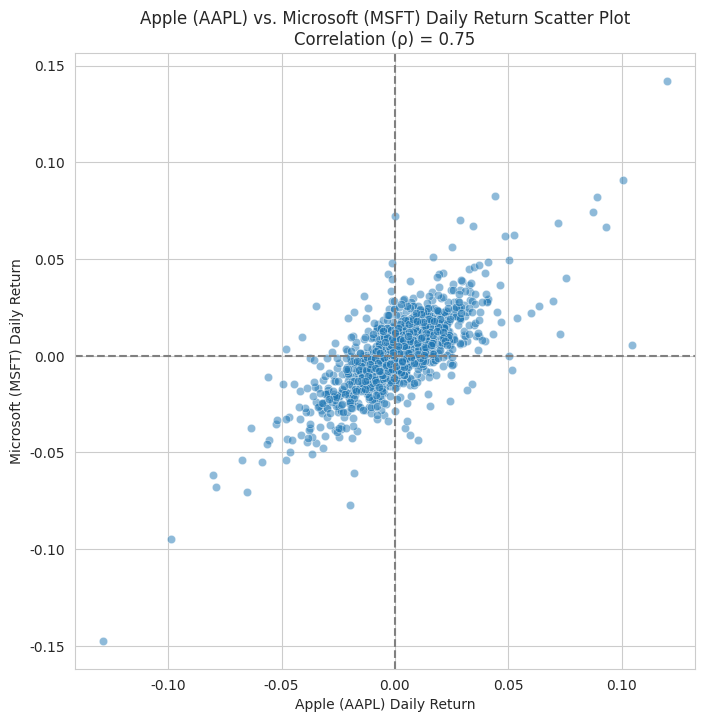

In [271]:
# Extract the correlation between Apple and Microsoft
corr_aapl_msft = correlation_matrix.loc['AAPL', 'MSFT']
print(f"\nCorrelation Coefficient of Daily Returns between Apple and Microsoft: {corr_aapl_msft:.4f}")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 8))
sns.scatterplot(x=returns['AAPL'], y=returns['MSFT'], alpha=0.5)
plt.title(f'Apple (AAPL) vs. Microsoft (MSFT) Daily Return Scatter Plot\nCorrelation (ρ) = {corr_aapl_msft:.2f}')
plt.xlabel('Apple (AAPL) Daily Return')
plt.ylabel('Microsoft (MSFT) Daily Return')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True)
plt.show()

Observation: Apple and Microsoft returns are strongly positively correlated, as they are both large-cap US tech stocks subject to similar market forces.

## Measuring Performance: Risk-Adjusted Returns
A good investment isn't just about high returns; it's about generating the best return for the amount of risk taken. The Sharpe Ratio is the most common measure for this.

### Sharpe Ratio: Measures the excess return (over the risk-free rate) per unit of total risk (standard deviation).

\begin{align}
\mathbf{Sharpe Ratio} = \frac{E[R_p]-r_f}{\sigma_p}
\end{align}

In [272]:
# Calculate Sharpe Ratio
risk_free_rate = 0.02

In [273]:
# Calculate the annualized return (EAR) and annualized volatility for Apple
aapl_ret_annual=(1+returns['AAPL'].mean())**trading_days-1
aapl_vol_annual=returns['AAPL'].std()*np.sqrt(trading_days)

In [274]:
# Calculate the annualized return (EAR) and annualized volatility for Microsoft
msft_ret_annual=(1+returns['MSFT'].mean())**trading_days-1
msft_vol_annual=returns['MSFT'].std()*np.sqrt(trading_days)

In [275]:
# Calculate the Sharpe Ratio
sharpe_aapl=(aapl_ret_annual-risk_free_rate)/aapl_vol_annual
sharpe_msft=(msft_ret_annual-risk_free_rate)/msft_vol_annual

In [276]:
print(sharpe_aapl,sharpe_msft)

1.0315440925005464 0.8607204636451553


#### The Sortino Ratio
The Sortino Ratio is a refinement of the Sharpe Ratio. Instead of using the total standard deviation in the denominator, it uses the downside deviation. This means it only penalizes for "bad" volatility, making it a superior measure for investments with non-normal or skewed return distributions.

\begin{align}
\mathbf{Sortino Ratio} = \frac{E[R_p]-r_f}{\sigma_d}
\end{align}

In [277]:
# Calculate the Sortino Ratio

def get_annual_downside_deviation(returns_series, mar=0.0, trading_days=252):
    downside_diff_sq = (returns_series[returns_series < mar] - mar)**2
    return np.sqrt(downside_diff_sq.mean()) * np.sqrt(trading_days)

In [278]:
# Calculate downside deviation for both stocks
dd_aapl=get_annual_downside_deviation(returns['AAPL'])
dd_msft=get_annual_downside_deviation(returns['MSFT'])

In [279]:
# Calculate Sortino Ratios
sortino_aapl=(aapl_ret_annual-risk_free_rate)/dd_aapl
sortino_msft=(msft_ret_annual-risk_free_rate)/dd_msft

In [280]:
print(f"\n--- Sortino Ratio (measures return per unit of DOWNSIDE risk) ---")
print(f"Apple (AAPL) Sortino Ratio: {sortino_aapl:.4f}")
print(f"Microsoft (MSFT) Sortino Ratio: {sortino_msft:.4f}")

# --- Comparison ---
print("\n--- Summary Table ---")
summary_df = pd.DataFrame({
    'Sharpe Ratio': [sharpe_aapl, sharpe_msft],
    'Sortino Ratio': [sortino_aapl, sortino_msft]
}, index=['AAPL', 'MSFT'])
print(summary_df)


--- Sortino Ratio (measures return per unit of DOWNSIDE risk) ---
Apple (AAPL) Sortino Ratio: 1.0421
Microsoft (MSFT) Sortino Ratio: 0.8613

--- Summary Table ---
      Sharpe Ratio  Sortino Ratio
AAPL      1.031544       1.042121
MSFT      0.860720       0.861316


## Diversification and Correlation: The Mean–Variance Geometry
Now, we will visually demonstrate the core principle of portfolio theory. The expected return of a two-asset portfolio is a linear combination of the individual returns, but its risk is a non-linear function due to the correlation term. This non-linearity is what creates the "diversification benefit."

We will plot the risk-return combinations for portfolios of AAPL and MSFT with varying weights.

In [281]:
# @title << Plot the Risk-Return Curve for a Two-Asset Portfolio >>
# Using the annualized returns, annualized volatilities, and correlation calculated above
mu_aapl = aapl_ret_annual
sigma_aapl = aapl_vol_annual
mu_msft =msft_ret_annual
sigma_msft = msft_vol_annual
rho = corr_aapl_msft

In [282]:
# Generate a series of portfolio weights (w1 from 0 to 1)
weights_aapl = np.linspace(0, 1, 101)
portfolio_returns = []
portfolio_vols = []

for w1 in weights_aapl:
    w2 =1-w1
    # Calculate portfolio return and volatility
    p_return =w1*mu_aapl+w1*mu_msft
    p_var =(w1**2*sigma_aapl**2)+(w2**2*sigma_msft**2)+(2*w1*w2*rho*sigma_aapl*sigma_msft)
    p_vol =np.sqrt(p_var)

    portfolio_returns.append(p_return)
    portfolio_vols.append(p_vol)

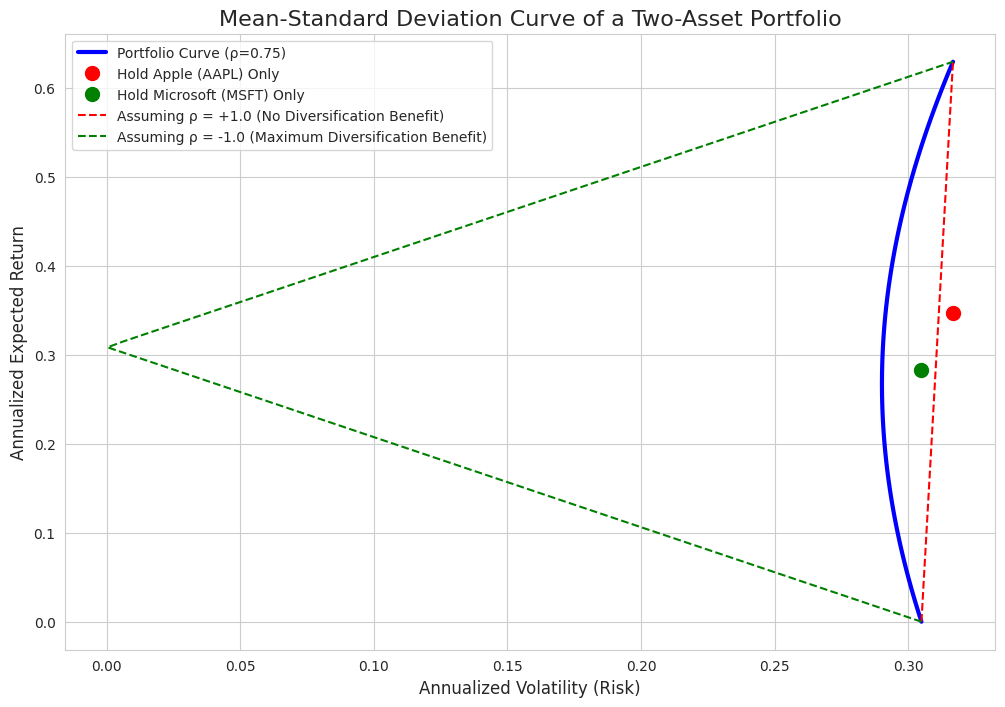

In [283]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(portfolio_vols, portfolio_returns, 'b-', lw=3, label=f'Portfolio Curve (ρ={rho:.2f})')
# Mark the locations of the individual assets
plt.plot(sigma_aapl, mu_aapl, 'ro', markersize=10, label='Hold Apple (AAPL) Only')
plt.plot(sigma_msft, mu_msft, 'go', markersize=10, label='Hold Microsoft (MSFT) Only')

# For comparison, plot the cases for ρ=1 (perfect positive correlation) and ρ=-1 (perfect negative correlation)
# Case: rho = 1 (straight line)
p_vol_rho1 = weights_aapl * sigma_aapl + (1 - weights_aapl) * sigma_msft
plt.plot(p_vol_rho1, portfolio_returns, 'r--', label='Assuming ρ = +1.0 (No Diversification Benefit)')

# Case: rho = -1
p_var_rhon1 = (weights_aapl**2 * sigma_aapl**2) + ((1 - weights_aapl)**2 * sigma_msft**2) - (2 * weights_aapl * (1-weights_aapl) * sigma_aapl * sigma_msft)
p_vol_rhon1 = np.sqrt(p_var_rhon1)
plt.plot(p_vol_rhon1, portfolio_returns, 'g--', label='Assuming ρ = -1.0 (Maximum Diversification Benefit)')


plt.title('Mean-Standard Deviation Curve of a Two-Asset Portfolio', fontsize=16)
plt.xlabel('Annualized Volatility (Risk)', fontsize=12)
plt.ylabel('Annualized Expected Return', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

**Observation:** The blue curve bends to the left, showing that for any given level of return between the two stocks, a portfolio exists that has a lower risk than a simple weighted average. This illustrates the diversification benefit.

## The Power of Many Assets: The Diversification Theorem in Action
The final and most powerful concept from the lecture is that as we add more assets to a portfolio, its firm-specific (idiosyncratic) risk is diversified away, leaving only the non-diversifiable systematic (market) risk.

We will simulate this by building equally-weighted portfolios with a growing number of stocks (N) randomly selected from the 50 U.S. Stocks and plotting the resulting portfolio risk.

In [284]:
# Simulate the Impact of N-Asset Diversification on Risk
# Get the list of 50 U.S. Stock tickers (Note: This list may not be real-time)
# Wikipedia is a good source

tickers_list = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'TSLA', 'JPM', 'JNJ', 'V', 'PG', 'UNH', 'HD', 'MA', 'BAC', 'DIS', 'PFE', 'KO', 'XOM', 'CSCO', 'PEP', 'WMT', 'CVX', 'ADBE', 'CRM', 'NFLX', 'TMO', 'ABT', 'ACN', 'MCD', 'COST', 'LLY', 'AVGO', 'NEE', 'LIN', 'ORCL', 'PM', 'NKE', 'HON', 'UPS', 'IBM', 'INTC', 'QCOM', 'SBUX', 'CAT', 'GS', 'MMM', 'BA', 'GE', 'DE', 'AMGN']

# Download data
print("Downloading U.S. stock price data...")
stocks_data = yf.download(tickers_list, start=start_date, end=end_date, progress=False, auto_adjust=False)['Adj Close'].dropna(axis=1) # dropna(axis=1) to remove stocks with missing data
stocks_returns = stocks_data.pct_change().dropna()
print(f"Data download complete! Obtained valid return data for {stocks_returns.shape[1]} stocks.")


Data download complete! Obtained valid return data for 50 stocks.


In [285]:
portfolio_risks = []
n_assets_range = range(1, 51) # Simulate portfolio sizes from 1 to 50

# Set a random seed for reproducibility
np.random.seed(42)

for n in n_assets_range:
    # Randomly select n stocks
    random_tickers = np.random.choice(stocks_returns.columns, n, replace=False)
    subset_returns = stocks_returns[random_tickers]

    # Create an equally weighted portfolio (w_i = 1/N)
    # Note: Here we directly calculate the mean return as weights are equal
    portfolio_return_series = subset_returns.mean(axis=1)

    # Calculate the annualized volatility of this portfolio
    annualized_vol = portfolio_return_series.std() * np.sqrt(trading_days)
    portfolio_risks.append(annualized_vol)

# Calculate the theoretical convergence limit: the square root of the average covariance
cov_matrix = stocks_returns.cov() * trading_days # Annualized covariance matrix
# Set the diagonal (variances) to NaN so they are not included in the mean calculation
np.fill_diagonal(cov_matrix.values, np.nan)
average_covariance = cov_matrix.unstack().mean()
asymptotic_risk_limit = np.sqrt(average_covariance)

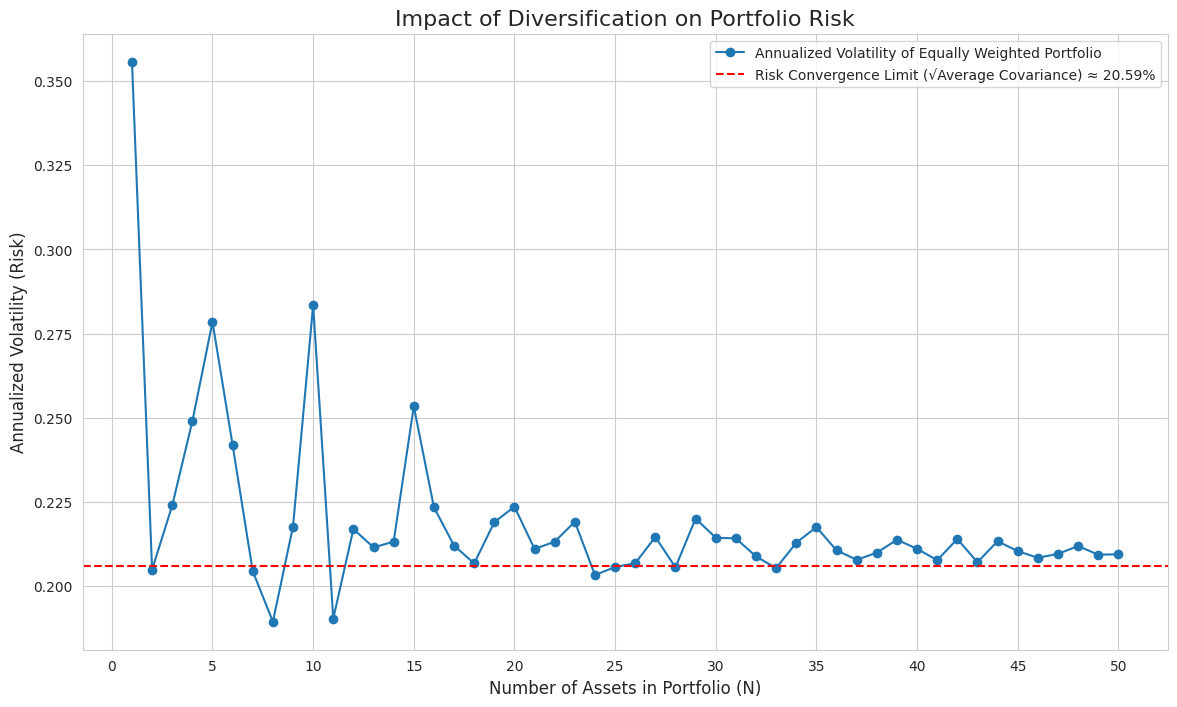


--- Theoretical Limit Calculation ---
Average Annualized Covariance (c̄): 0.042411
Theoretical Lower Limit of Portfolio Risk (√c̄): 0.2059 or 20.59%


In [286]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(n_assets_range, portfolio_risks, 'o-', label='Annualized Volatility of Equally Weighted Portfolio')
plt.axhline(asymptotic_risk_limit, color='red', linestyle='--',
            label=f'Risk Convergence Limit (√Average Covariance) ≈ {asymptotic_risk_limit:.2%}')

plt.title('Impact of Diversification on Portfolio Risk', fontsize=16)
plt.xlabel('Number of Assets in Portfolio (N)', fontsize=12)
plt.ylabel('Annualized Volatility (Risk)', fontsize=12)
plt.xticks(np.arange(0, 51, 5))
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Theoretical Limit Calculation ---")
print(f"Average Annualized Covariance (c̄): {average_covariance:.6f}")
print(f"Theoretical Lower Limit of Portfolio Risk (√c̄): {asymptotic_risk_limit:.4f} or {asymptotic_risk_limit:.2%}")

**Observation:** The graph clearly shows that as we add more assets (increase N), the portfolio's total risk decreases sharply at first, then begins to level off. The diversifiable, idiosyncratic risk is eliminated, and the remaining risk is the systematic market risk that affects all stocks and cannot be diversified away. This is the most important lesson in portfolio management.